Ames Home Pricing Notebook
=

This notebook contains everything for the project from EDA all the way to the predictive model.  Please note that there is an issue with the kaggle submission code that I have not been able to debug, I was able to submit my first model and cannot submit subsequent sadly. 

**Importing Libraries**

In [1]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.stats import ttest_ind
from sklearn import metrics as ms
import statsmodels.api as sm

**Sources Used**

https://www.pythonpool.com/python-scientific-notation/  I prefer looking at the MSE in scientific notation
so that I do not have to figure out the order of magnitude.

A pluralsight guide on regression
https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

Tutorial on pulling the column names to list
https://datatofish.com/list-column-names-pandas-dataframe/

I forgot how to save images to files for my presentation lol
https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib

In [2]:
#function imports
#converting column names to snake_case, this was a function I developed in project one
def to_snake_case(input_string, to_lower = True):
    """Takes a string and converts the spaces to underscores
    input_sting is the string input variable
    default option to lowercase all the string characters"""
    if to_lower:
        output_string='_'.join(input_string.lower().split())
    else:
        output_string='_'.join(input_string.lower().split())
    return output_string

Initial Data Import and Overall Reivew
=

Bringing in training and test sets, then proceeding to getting an overview of the data.

In [3]:
df_sample=pd.read_csv('./datasets/sample_sub_reg.csv')
hd_df=pd.read_csv('./datasets/train.csv')

In [4]:
hd_test_df=pd.read_csv('./datasets/test.csv')

In [5]:
hd_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
hd_df.shape

(2051, 81)

In [7]:
hd_test_df.shape

(878, 80)

In [8]:
hd_df.columns=map(lambda x: to_snake_case(x),hd_df.columns)
hd_test_df.columns=map(lambda x: to_snake_case(x),hd_test_df.columns)

Changing the columns to snake_case.

In [9]:
hd_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [10]:
#pd.set_option('display.max_rows',81)

In [11]:
pd.set_option('display.max_rows',81)
hd_df.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

Lots of objects, will need to feature engineer these categories.

In [12]:
hd_df.isna().sum().sort_values(ascending=False).head(27)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
dtype: int64

In [13]:
#CLONE BLOCK ONE
hd_df["garage_area"]=hd_df["garage_area"].map(lambda x: np.nan_to_num(x))  #Only one NA value
hd_df["mas_vnr_area"]=hd_df["mas_vnr_area"].map(lambda x: np.nan_to_num(x))  #There are also 22 observations of masonry type so these lots just do not have a correct 0 or none type
hd_df["total_bsmt_sf"]=hd_df["total_bsmt_sf"].map(lambda x: np.nan_to_num(x)) #Only one NA value
hd_df["lot_frontage"]=hd_df["lot_frontage"].map(lambda x: np.nan_to_num(x)) 
hd_df["bsmt_full_bath"]=hd_df["bsmt_full_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_df["bsmt_half_bath"]=hd_df["bsmt_half_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_df["bsmt_qual"]=hd_df["bsmt_qual"].map(lambda x: np.nan_to_num(x))  #we can just null these since no basement is the NA valu
hd_df["bsmt_exposure"]=hd_df["bsmt_exposure"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmtfin_type_2"]=hd_df["bsmtfin_type_2"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmtfin_type_1"]=hd_df["bsmtfin_type_1"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmt_cond"]=hd_df["bsmt_cond"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df['pool_qc']=hd_df['pool_qc'].map(lambda x: np.nan_to_num(x))
hd_df['misc_val']=hd_df['misc_val'].map(lambda x: np.nan_to_num(x))
hd_df['misc_feature']=hd_df['misc_feature'].map(lambda x: np.nan_to_num(x))
hd_df['fence']=hd_df['fence'].map(lambda x: np.nan_to_num(x))
hd_df['fireplace_qu']=hd_df['fireplace_qu'].map(lambda x: np.nan_to_num(x))
hd_df['electrical']=hd_df['electrical'].map(lambda x: np.nan_to_num(x))

In [14]:
hd_df.isna().sum().sort_values(ascending=False).head(27)

alley              1911
garage_finish       114
garage_yr_blt       114
garage_qual         114
garage_cond         114
garage_type         113
mas_vnr_type         22
bsmtfin_sf_2          1
bsmtfin_sf_1          1
garage_cars           1
bsmt_unf_sf           1
totrms_abvgrd         0
2nd_flr_sf            0
functional            0
low_qual_fin_sf       0
gr_liv_area           0
kitchen_qual          0
kitchen_abvgr         0
bedroom_abvgr         0
fireplaces            0
full_bath             0
bsmt_half_bath        0
bsmt_full_bath        0
half_bath             0
id                    0
fireplace_qu          0
electrical            0
dtype: int64

In [15]:
hd_test_df.isna().sum().sort_values(ascending=False).head(27)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
totrms_abvgrd       0
bedroom_abvgr       0
half_bath           0
full_bath           0
bsmt_half_bath      0
bsmt_full_bath      0
gr_liv_area         0
dtype: int64

Of the 81 columns and 2051 entries of housing data, the a few features have many values falling in the 'NAN' true category

In many cases I can null these out using np.nan_to_num.  There are several where its only a one or two values, so nulling these out is negligible to the data set.  For the basement and garage cases, most of those are NA because the lot does not have that feature so null can be used in this case to signify the lack of the feature altogether.  Similar with Pool QC, Fence, Alley, Fireplace Qu and Misc Features.  Lot frontage nulls will altered based on lot area using an LR fit between those two categories.

### EDA Section

In [16]:
pd.set_option('display.max_rows',28)

In [17]:
hd_df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

Briefly looking at our target variable in the training set, the minimum and maximum do diverge significantly from the main data set.

In [18]:
#CLONE BLOCK TWO
SP_mean=hd_df['saleprice'].mean()
SP_std=hd_df['saleprice'].std()
print('Sale price mean of',SP_mean)
print('Range of the first standard deviation for sale price',SP_mean-SP_std,SP_mean+SP_std)

Sale price mean of 181469.70160897123
Range of the first standard deviation for sale price 102211.04225660561 260728.36096133685


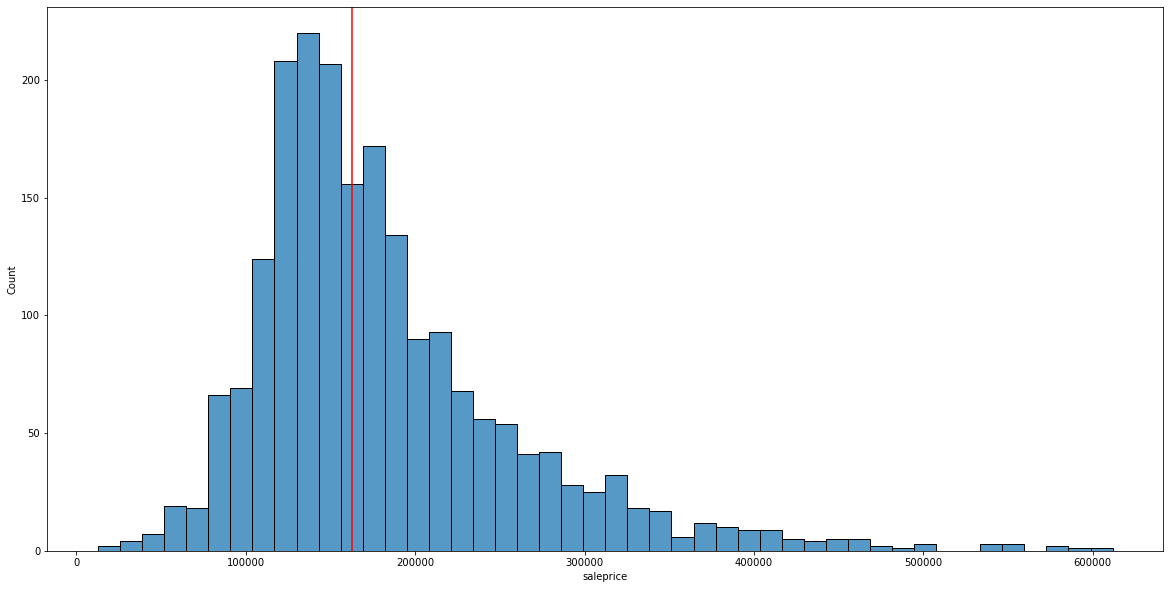

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(data=hd_df,x="saleprice");
plt.axvline(hd_df['saleprice'].median(), color = 'Red');

A quick histogram of the saleprice data (our target variable to model) shows that in the training data we do have somewhat of a normal distribution that then trails off at higher prices.  Before evening modeling this means there will be some challenge in describing the variance from the mean with the higher prices.

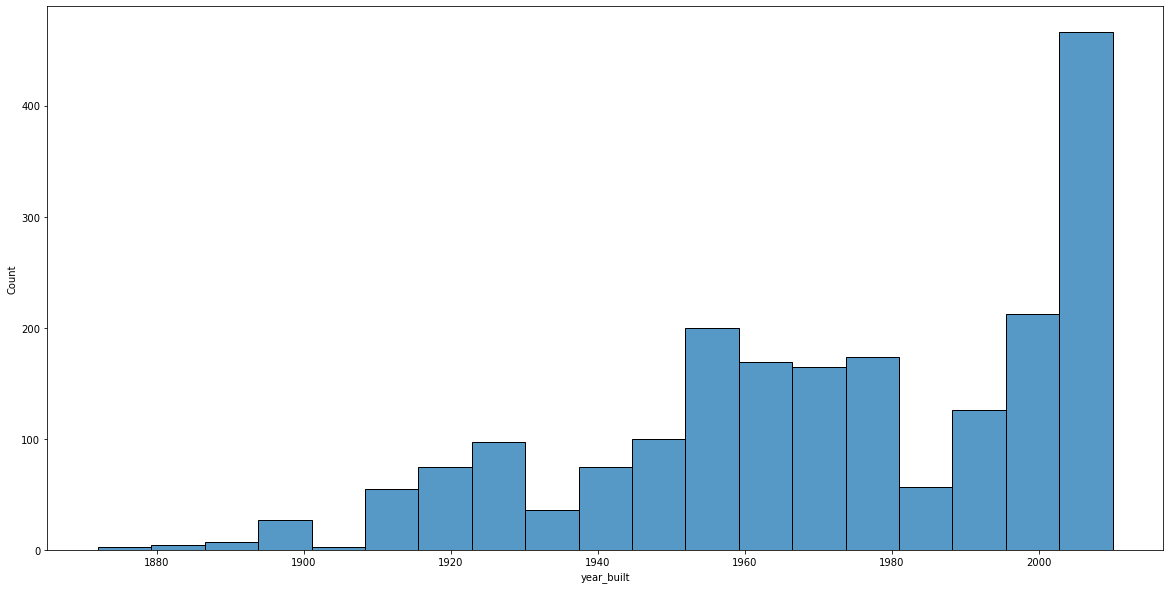

In [20]:
plt.figure(figsize=(20,10))
sns.histplot(data=hd_df,x="year_built");

Looking at the date of the home being built.  Might even be ok to bin by pre 1950, 1950-2000 and after 2000.

In [21]:
print('Number of houses built prior to 1950:',hd_df[(hd_df['year_built']<1950)].shape[0])
print('Number of houses built between 1950 and 2000:',hd_df[(hd_df['year_built']>=1950) & (hd_df['year_built']<2000)].shape[0])
print('Number of houses built 2000 and onward:',hd_df[(hd_df['year_built']>=2000)].shape[0])
print('Total entries with year built value',hd_df[(hd_df['year_built']>=2000)].shape[0]+hd_df[(hd_df['year_built']>=1950) & (hd_df['year_built']<2000)].shape[0]+hd_df[(hd_df['year_built']<1950)].shape[0])

Number of houses built prior to 1950: 441
Number of houses built between 1950 and 2000: 1048
Number of houses built 2000 and onward: 562
Total entries with year built value 2051


Year built could be a 

Prior to data cleaning and processing, going to look at correlations.  For highly correlated values to sale price its possible to leave some of this data unchanged (minus any issues with NAN values and such) going into scaling and letting the model fitting do the work.

In [22]:
#correlations
corrsp=hd_df.corr()[['saleprice']].sort_values(by='saleprice',key=np.abs,ascending=False)

<AxesSubplot:>

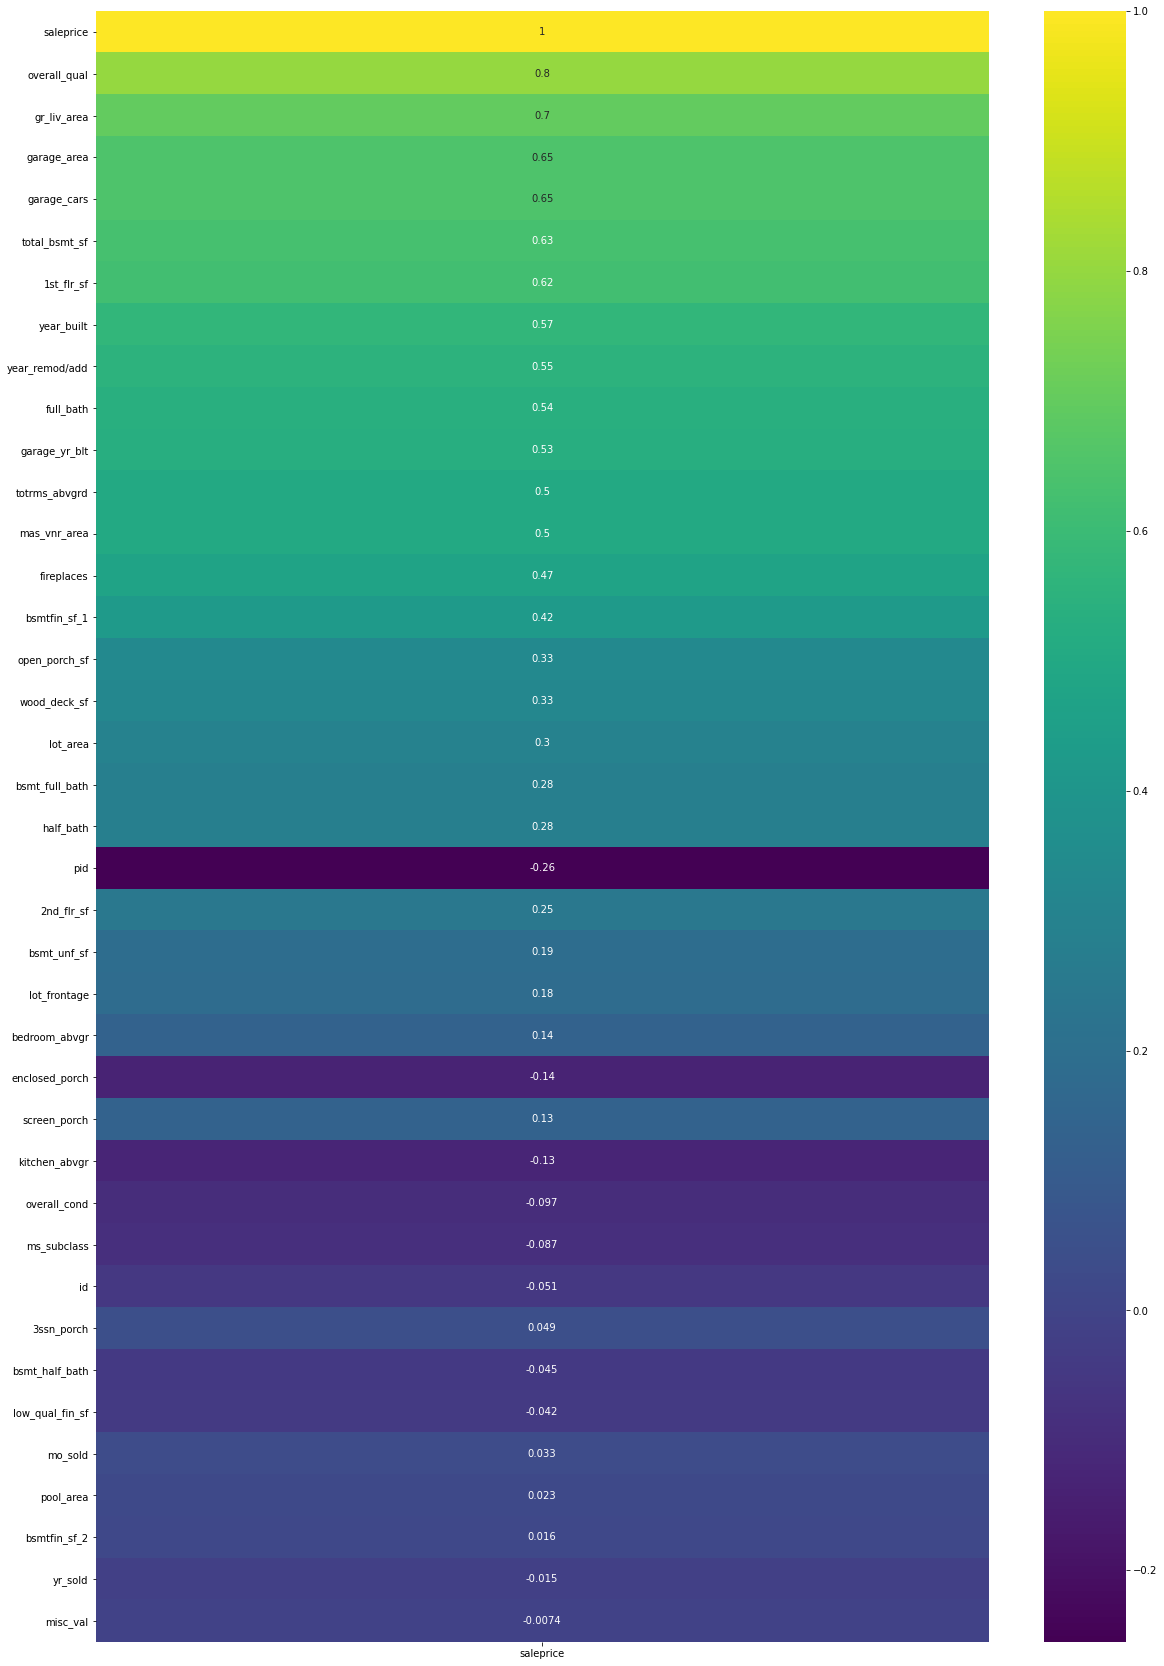

In [23]:
plt.figure(figsize=(20,30))

sns.heatmap(corrsp, annot=True, cmap = 'viridis')

Highly correlated values such as Overall Quality, Ground Level Living Area, Garage Area, Total Basement Square footage, etc. I just unquestionably added to my model.

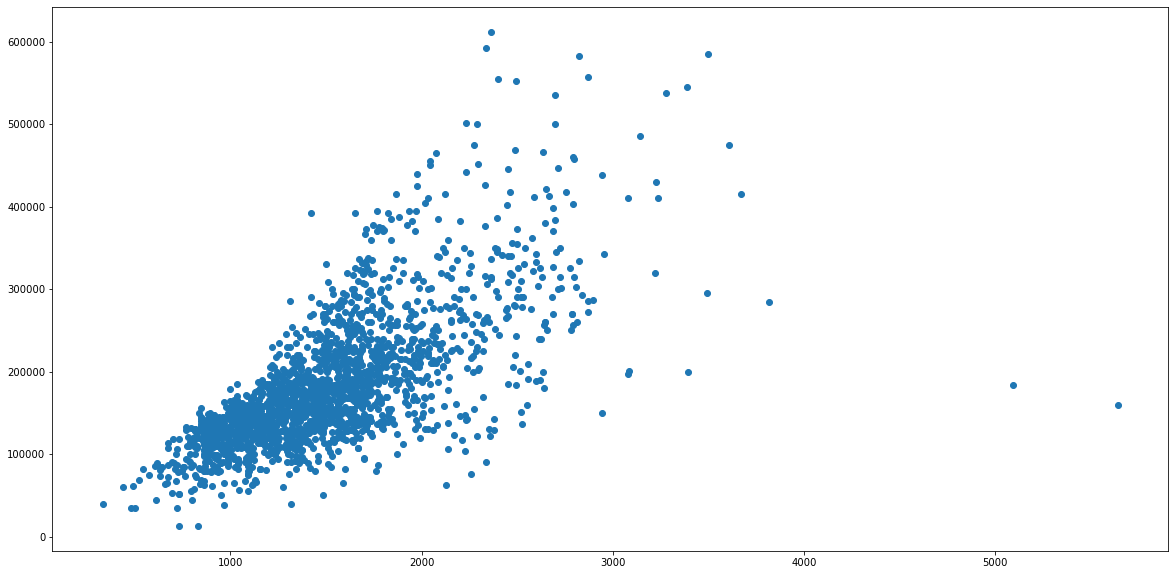

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(hd_df['gr_liv_area'],hd_df['saleprice']);

The data set has a reminder that their are a few outliers in the data, easily seen with the above plot sale price vs ground level living area.   Might be an ok idea to reign those values in, possibly setting their ground living space value to the mean of the data for that category. 

In [25]:
hd_df['gr_liv_area'].mean()

1499.330082886397

In [26]:
#pd.set_option('display.max_rows',100)
hd_df[hd_df['gr_liv_area']>4000].T

,960,1885
id,1499,2181
pid,908154235,908154195
ms_subclass,60,20
ms_zoning,RL,RL
lot_frontage,313.0,128.0
...,...,...
misc_val,0,17000
mo_sold,1,10
yr_sold,2008,2007
sale_type,New,New


Filtering to look at the two outliers regarding the ground living area.

## EDA Categories with Object Values

I am not even entertaining PID, even if there exists some correlation with this value it is an arbitrarily assigned value in theory.

In [27]:
hd_df['ms_subclass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: ms_subclass, dtype: int64

In [28]:
hd_df.groupby('ms_subclass')['saleprice'].mean().sort_values(ascending = False)

ms_subclass
60     239225.769036
120    211813.613636
75     204875.000000
20     189305.488312
80     169569.825581
85     154398.214286
70     153354.455556
150    148400.000000
90     139296.333333
160    138452.215909
50     137270.000000
190    124310.326087
40     119125.000000
45     116372.727273
180    109672.727273
30      94936.346535
Name: saleprice, dtype: float64

Going to bin the values above the mean, in close proximity to the mean, and below the mean.  I will then leave the mean category so as to compare in dummification to that category.

In [29]:
hd_df['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [30]:
hd_df.groupby('ms_zoning')['saleprice'].mean().sort_values(ascending = False)

ms_zoning
FV         218618.316832
RL         191235.164581
RH         148859.571429
RM         129119.142405
C (all)     78010.894737
I (all)     57625.000000
A (agr)     47300.000000
Name: saleprice, dtype: float64

In [31]:
hd_df.groupby('ms_zoning')['saleprice'].median().sort_values(ascending = False)

ms_zoning
FV         208900
RL         172500
RH         152217
RM         123900
C (all)     75000
I (all)     57625
A (agr)     47300
Name: saleprice, dtype: int64

The residential low density has over 75% of the observations, this set might not be good for dummification.  RP is missing as a nominal value so that will be folded into RL since it is also low density residential.  I am going to scale everything to the mean so that these nominal values can be used in an interaction term.

In [32]:
#CLONE BLOCK THREE
FV_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['FV']/SP_mean
RL_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['RL']/SP_mean
RH_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['RH']/SP_mean
RM_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['RM']/SP_mean
C_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['C (all)']/SP_mean
I_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['I (all)']/SP_mean
A_val=hd_df.groupby('ms_zoning')['saleprice'].mean()['A (agr)']/SP_mean

In [33]:
hd_df[hd_df['lot_frontage'].isna()].groupby(by='bldg_type')['id'].count()

Series([], Name: id, dtype: int64)

In [34]:
hd_df[hd_df['lot_frontage'].isna()].groupby(by='bldg_type')['lot_area'].mean()

Series([], Name: lot_area, dtype: int64)

In [35]:
hd_df[hd_df['lot_frontage'].isna()].groupby(by='bldg_type')['gr_liv_area'].mean()

Series([], Name: gr_liv_area, dtype: int64)

Based on this it does appear as though the NAN values are errors and not lots where the property has no lot frontage.  I will fill these values by running a linear regression between lot area and lot frontage and the rest of the data

In [36]:
hd_df['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

Almost entirely paved not going to use this data in my model.

In [37]:
#CLONE BLOCK FOUR
#hd_df['alley']=hd_df['alley'].map({'Pave':2,'Grvl':0})
hd_df["alley"]=hd_df["alley"].map(lambda x: np.nan_to_num(x,copy=True, nan=1, posinf=None, neginf=None))
hd_df['alley'].value_counts()

1.0     1911
Grvl      85
Pave      55
Name: alley, dtype: int64

In [38]:
hd_df.groupby('alley')['saleprice'].mean().sort_values(ascending = False)

alley
1.0     184366.258503
Pave    174534.709091
Grvl    120835.635294
Name: saleprice, dtype: float64

Having an alleyway is a negative feature with respect to the mean, so this can be used in an engineered feature.  No alleyway is close enough to the mean of the data set so its ok to leave that at 1.

In [39]:
#CLONE BLOCK FIVE
Grvl_val=hd_df.groupby('alley')['saleprice'].mean()['Grvl']/SP_mean
Pave_val=hd_df.groupby('alley')['saleprice'].mean()['Pave']/SP_mean

In [40]:
hd_df[['lot_shape']].value_counts()

lot_shape
Reg          1295
IR1           692
IR2            55
IR3             9
dtype: int64

In [41]:
hd_df.groupby('lot_shape')['saleprice'].mean().sort_values(ascending = False)

lot_shape
IR2    233954.745455
IR1    211848.670520
IR3    193182.222222
Reg    162925.812355
Name: saleprice, dtype: float64

Our ordinal for this will be IR2>IR1>IR1>Reg

In [42]:
hd_df['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [43]:
hd_df.groupby('land_contour')['saleprice'].mean().sort_values(ascending = False)

land_contour
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Bnk    142868.775000
Name: saleprice, dtype: float64

Because of the magnitude of the values is not high outside of level terrain, once again normalize to use in a product term for land properties.

In [44]:
#CLONE BLOCK SIX
HLS_val=hd_df.groupby('land_contour')['saleprice'].mean()['HLS']/SP_mean
Low_val=hd_df.groupby('land_contour')['saleprice'].mean()['Low']/SP_mean
Lvl_val=hd_df.groupby('land_contour')['saleprice'].mean()['Lvl']/SP_mean
Bnk_val=hd_df.groupby('land_contour')['saleprice'].mean()['Bnk']/SP_mean

In [45]:
hd_df['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [46]:
hd_df.groupby('land_slope')['saleprice'].mean().sort_values(ascending = False)

land_slope
Mod    204639.465909
Sev    194598.000000
Gtl    180358.476703
Name: saleprice, dtype: float64

Gentle slope is the vast majority of the observations, Mod>Sev>Gtl> however might not use this because of the distribution.

In [47]:
hd_df['lot_config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [48]:
hd_df.groupby('lot_config')['saleprice'].mean().sort_values(ascending = False)

lot_config
CulDSac    230744.358779
FR3        198600.000000
Corner     180629.591954
Inside     177537.014637
FR2        174703.600000
Name: saleprice, dtype: float64

Lot config scaled to mean, dummification would be difficult to use here with the large number of observations with the Inside observation.

In [49]:
#CLONE BLOCK SEVEN
CulDSac_val=hd_df.groupby('lot_config')['saleprice'].mean()['CulDSac']/SP_mean
FR3_val=hd_df.groupby('lot_config')['saleprice'].mean()['FR3']/SP_mean
Corner_val=hd_df.groupby('lot_config')['saleprice'].mean()['Corner']/SP_mean
Inside_val=hd_df.groupby('lot_config')['saleprice'].mean()['Inside']/SP_mean
FR2_val=hd_df.groupby('lot_config')['saleprice'].mean()['FR2']/SP_mean

In [50]:
hd_df['utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [51]:
hd_test_df['utilities'].value_counts()

AllPub    877
NoSewr      1
Name: utilities, dtype: int64

Utilities is not going to be very help for linear regression, data is almost 100% all public utilities at the lot in question.

In [52]:
hd_df['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

Neighborhood grouped by sale price mean, four per new naming scheme.

In [53]:
hd_df.groupby('neighborhood')['saleprice'].mean().sort_values(ascending = False)

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [54]:
#CLONE BLOCK EIGHT
hd_df['neighborhood']=hd_df['neighborhood'].map({'StoneBr':'n_class_1','NridgHt':'n_class_1','NoRidge':'n_class_1','GrnHill':'n_class_1',\
'Veenker':'n_class_2','Timber':'n_class_2','Somerst':'n_class_2','ClearCr':'n_class_2',\
'Crawfor':'n_class_3','CollgCr':'n_class_3','Blmngtn':'n_class_3','NWAmes':'n_class_3',\
'Gilbert':'n_class_4','Greens':'n_class_4','SawyerW':'n_class_4','Mitchel':'n_class_4',\
'NAmes':'n_class_5','Blueste':'n_class_5','NPkVill':'n_class_5','Sawyer':'n_class_5',\
'Landmrk':'n_class_6','SWISU':'n_class_6','Edwards':'n_class_6','BrkSide':'n_class_6',\
'OldTown':'n_class_7','BrDale':'n_class_7','IDOTRR':'n_class_7','MeadowV':'n_class_7'})

In [55]:
hd_df['neighborhood'].value_counts()

n_class_5    444
n_class_3    360
n_class_4    288
n_class_7    275
n_class_6    252
n_class_2    222
n_class_1    210
Name: neighborhood, dtype: int64

In [56]:
hd_df.groupby('neighborhood')['saleprice'].mean().sort_values(ascending = False)

neighborhood
n_class_1    322167.719048
n_class_2    231023.891892
n_class_3    201137.580556
n_class_4    182637.072917
n_class_5    143498.862613
n_class_6    130014.186508
n_class_7    115511.843636
Name: saleprice, dtype: float64

Split into 7 groups, going down the list on mean pricing they were grouped together in that fashion.  n_class_4 is around the mean so it will be dropped to provide as the 'comparison' point for the rest of the dummy variables.

In [57]:
hd_df['condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [58]:
hd_df.groupby('condition_1')['saleprice'].mean().sort_values(ascending = False)

condition_1
PosN      254794.296296
PosA      254733.333333
RRNn      198208.333333
Norm      185007.310130
RRAn      172604.777778
Feedr     143223.605505
RRAe      139685.714286
RRNe      129616.666667
Artery    128765.000000
Name: saleprice, dtype: float64

The positive high leverage values in condition could be feature engineered to assist 

In [59]:
hd_df['condition_2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

In [60]:
hd_df.groupby('condition_2')['saleprice'].mean().sort_values(ascending = False)

condition_2
PosN      395666.666667
PosA      390666.666667
RRAe      190000.000000
Norm      181382.075556
RRAn      136905.000000
Feedr     129181.818182
Artery    119050.000000
RRNn       96750.000000
Name: saleprice, dtype: float64

Some high leverage values in condition 2

## Exterior Features EDA

In [61]:
hd_df['bldg_type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [62]:
hd_df.groupby('bldg_type')['saleprice'].mean().sort_values(ascending = False)

bldg_type
TwnhsE    198312.372671
1Fam      185275.685882
Duplex    139296.333333
Twnhs     133100.000000
2fmCon    123179.891304
Name: saleprice, dtype: float64

Townhouse end units and single families are slightly higher then the sample mean, the remaining categories could be used as negative values

In [63]:
hd_df['roof_style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

In [64]:
hd_df.groupby('roof_style')['saleprice'].mean().sort_values(ascending = False)

roof_style
Hip        224366.654912
Shed       208666.666667
Flat       191613.076923
Gable      171264.253243
Mansard    152642.857143
Gambrel    138208.333333
Name: saleprice, dtype: float64

Hip, Shed and Flat roof types are all above the mean and make up just over 20% of the data set, believe it will be ok to hot encode these entries.  If there was more distribution of the category then dummification might have been in play.

In [65]:
hd_df['roof_matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: roof_matl, dtype: int64

In [66]:
hd_df.groupby('roof_matl')['saleprice'].mean().sort_values(ascending = False)

roof_matl
WdShngl    339400.000000
WdShake    264250.000000
Membran    241500.000000
Tar&Grv    187948.933333
CompShg    180849.197037
ClyTile    160000.000000
Name: saleprice, dtype: float64

Wood shingles and wood shakes (both mean values above the price 1st standard deviation) along with membrane could be used to specifically callout higher sale priced houses.  Most houses to no surprise have regular shingles so this feature is not good at showing significant variance.

In [67]:
hd_df['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [68]:
hd_df.groupby('house_style')['saleprice'].mean().sort_values(ascending = False)

house_style
2.5Fin    243666.666667
2Story    206408.963211
2.5Unf    191785.714286
1Story    179809.194523
SLvl      166248.989362
SFoyer    149343.920000
1.5Fin    136480.091743
1.5Unf    112466.666667
Name: saleprice, dtype: float64

In [69]:
hd_df['exterior_1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
AsphShn      1
ImStucc      1
Name: exterior_1st, dtype: int64

In [70]:
hd_df.groupby('exterior_1st')['saleprice'].mean().sort_values(ascending = False)

exterior_1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    243429.088889
VinylSd    218174.082873
BrkFace    193055.093750
Plywood    170511.453947
HdBoard    159582.473333
WdShing    155616.822222
MetalSd    154402.048338
Wd Sdng    142940.887681
Stucco     139712.962963
BrkComm    131000.000000
AsbShng    103183.333333
CBlock      93250.000000
AsphShn     82375.000000
Name: saleprice, dtype: float64

Missing the 'Other' and 'PreCast' values missing, will null these out (don't have good similar data points for the PreCast).  Immitation stucco and stone can be used as high leverage values

In [71]:
hd_df['exterior_2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: exterior_2nd, dtype: int64

In [72]:
hd_df.groupby('exterior_2nd')['saleprice'].mean().sort_values(ascending = False)

exterior_2nd
CmentBd    239540.200000
ImStucc    227472.727273
VinylSd    217798.685160
BrkFace    187992.647059
Plywood    166485.713514
HdBoard    160836.880000
MetalSd    155978.635802
Wd Shng    154244.444444
Stucco     147725.333333
Wd Sdng    145654.396947
Stone      145420.666667
Brk Cmn    139958.823529
AsphShn    132125.000000
AsbShng    107108.928571
CBlock      92000.000000
Name: saleprice, dtype: float64

In [73]:
hd_df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [74]:
hd_df.groupby('mas_vnr_type')['saleprice'].mean().sort_values(ascending = False)

mas_vnr_type
Stone      263714.702381
BrkFace    212161.436508
None       153679.275862
BrkCmn     144515.692308
Name: saleprice, dtype: float64

In [75]:
hd_df['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [76]:
hd_df.groupby('exter_qual')['saleprice'].mean().sort_values(ascending = False)

exter_qual
Ex    374460.308642
Gd    230802.484935
TA    143270.978348
Fa     89801.192308
Name: saleprice, dtype: float64

## Basement Related Features EDA

In [77]:
hd_df['foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

In [78]:
hd_df.groupby('foundation')['saleprice'].mean().sort_values(ascending = False)

foundation
PConc     227676.483801
Wood      173750.000000
CBlock    148415.530707
Stone     143235.200000
BrkTil    129050.190045
Slab      108810.676471
Name: saleprice, dtype: float64

Could use the lower values as negative correlations

In [79]:
hd_df['bsmt_qual'].value_counts()

TA     887
Gd     864
Ex     184
Fa      60
0.0     55
Po       1
Name: bsmt_qual, dtype: int64

In [80]:
hd_df.groupby('bsmt_qual')['saleprice'].mean().sort_values(ascending = False)

bsmt_qual
Ex     329506.619565
Gd     202537.582176
TA     139988.461105
Fa     107752.166667
0.0    106341.345455
Po      89000.000000
Name: saleprice, dtype: float64

Good distribution of values in this feature, can use as a ordinal with standard ratings

In [81]:
hd_df['bsmt_cond'].value_counts()

TA     1834
Gd       89
Fa       65
0.0      55
Po        5
Ex        3
Name: bsmt_cond, dtype: int64

In [82]:
hd_df.groupby('bsmt_cond')['saleprice'].mean().sort_values(ascending = False)

bsmt_cond
Gd     223969.550562
Ex     195000.000000
TA     184021.858233
Po     124063.200000
Fa     118629.076923
0.0    106341.345455
Name: saleprice, dtype: float64

some negative leverage possible with this feature, and also with the Gd category which is 40k above the mean sample price

In [83]:
hd_df['bsmt_exposure'].value_counts()

No     1339
Av      288
Gd      203
Mn      163
0.0      58
Name: bsmt_exposure, dtype: int64

In [84]:
hd_df.groupby('bsmt_exposure')['saleprice'].mean().sort_values(ascending = False)

bsmt_exposure
Gd     271610.566502
Av     206262.451389
Mn     189377.570552
No     164533.532487
0.0    111635.913793
Name: saleprice, dtype: float64

Good variation of values, can assign ordinal and use as is 

In [85]:
hd_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
0.0     55
Name: bsmtfin_type_1, dtype: int64

In [86]:
hd_df.groupby('bsmtfin_type_1')['saleprice'].mean().sort_values(ascending = False)

bsmtfin_type_1
GLQ    237597.245528
Unf    166155.257048
ALQ    164368.017065
LwQ    153266.921569
BLQ    150107.020000
Rec    143263.382514
0.0    106341.345455
Name: saleprice, dtype: float64

These values have a very good variance, can set ordinal values and use as is

In [87]:
hd_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
0.0      56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [88]:
hd_df.groupby('bsmtfin_type_2')['saleprice'].mean().sort_values(ascending = False)

bsmtfin_type_2
GLQ    221300.000000
ALQ    188567.142857
Unf    185221.284162
Rec    164538.750000
LwQ    162284.583333
BLQ    156659.020833
0.0    109513.821429
Name: saleprice, dtype: float64

Due to the large number of unfinished basements observed, this category does not seem so helpful, the basement finish type 1 does a little bit better job at this feature description.

In [89]:
hd_df['heating'].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

In [90]:
hd_df.groupby('heating')['saleprice'].mean().sort_values(ascending = False)

heating
GasA    182422.47671
GasW    151275.00000
OthW    125750.00000
Wall     77150.00000
Grav     65180.00000
Name: saleprice, dtype: float64

Floor furnance heating is missing, could be hot encoded to explain variance below the price mean.

In [91]:
hd_df['heating_qc'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [92]:
hd_df.groupby('heating_qc')['saleprice'].mean().sort_values(ascending = False)

heating_qc
Ex    216027.607512
Gd    160174.009404
TA    138986.705193
Fa    117123.641791
Po     69033.333333
Name: saleprice, dtype: float64

The quality and condition of the heating system appears to be a good metric to use with an ordinal rating. 5 down to 1 for Ex, Gd, TA, Fa, and Po.

In [93]:
hd_df['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [94]:
hd_df.groupby('central_air')['saleprice'].mean().sort_values(ascending = False)

central_air
Y    187441.503665
N    100575.078014
Name: saleprice, dtype: float64

This can act as a negative indicator due to the stark contrast between having and not having central air, but would need to be combined with other factors.

In [95]:
hd_df['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [96]:
hd_df.groupby('electrical')['saleprice'].mean().sort_values(ascending = False)

electrical
SBrkr    187770.382227
FuseA    122565.157143
FuseF    103678.914286
FuseP     83485.714286
Mix       67000.000000
Name: saleprice, dtype: float64

This can also act a negative indicator, same reasoning as the central air feature applies.

## Additional House Features

In [97]:
hd_df['functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: functional, dtype: int64

In [98]:
hd_df.groupby('functional')['saleprice'].mean().sort_values(ascending = False)

functional
Typ     183954.749347
Maj1    163106.166667
Min1    154429.761905
Min2    150424.571429
Mod     148108.724138
Sev      95750.000000
Maj2     87157.714286
Sal      31550.000000
Name: saleprice, dtype: float64

Negative parameters in this feature diverge from the mean, again this could be used in an engineered feature with other negative parameters

In [99]:
hd_df['fireplace_qu'].value_counts()

0.0    1000
Gd      523
TA      407
Fa       59
Ex       31
Po       31
Name: fireplace_qu, dtype: int64

In [100]:
hd_df["fireplace_qu"]=hd_df["fireplace_qu"].apply(lambda x: 'NoFp' if x == 0 else x)

In [101]:
hd_df.groupby('fireplace_qu')['saleprice'].mean().sort_values(ascending = False)

fireplace_qu
Ex      331481.483871
Gd      233578.388145
TA      204893.621622
Fa      170287.203390
NoFp    142001.103000
Po      139263.967742
Name: saleprice, dtype: float64

Fireplace quality will just need enumeration, will swap the null case with poor for the lowest ordinal value.

In [102]:
hd_df["garage_type"]=hd_df["garage_type"].map(lambda x: np.nan_to_num(x))
hd_df["garage_type"]=hd_df["garage_type"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_df["garage_qual"]=hd_df["garage_qual"].map(lambda x: np.nan_to_num(x))
hd_df["garage_qual"]=hd_df["garage_qual"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_df["garage_finish"]=hd_df["garage_finish"].map(lambda x: np.nan_to_num(x))
hd_df["garage_finish"]=hd_df["garage_finish"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_df["garage_yr_blt"]=hd_df["garage_yr_blt"].map(lambda x: np.nan_to_num(x))
hd_df["garage_yr_blt"]=hd_df["garage_yr_blt"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_df["garage_cond"]=hd_df["garage_cond"].map(lambda x: np.nan_to_num(x))
hd_df["garage_cond"]=hd_df["garage_cond"].apply(lambda x: 'NoGar' if x == 0 else x)

In [103]:
hd_df['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NoGar       113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [104]:
hd_df.groupby('garage_type')['saleprice'].mean().sort_values(ascending = False)

garage_type
BuiltIn    247883.522727
Attchd     205040.195383
2Types     157184.210526
Basment    143242.333333
Detchd     132132.947761
NoGar      105669.150442
CarPort    103823.545455
Name: saleprice, dtype: float64

A couple types could be combined well for this feature, good spread of values.

In [105]:
hd_df['garage_finish'].value_counts()

Unf      849
RFn      579
Fin      509
NoGar    114
Name: garage_finish, dtype: int64

In [106]:
hd_df.groupby('garage_finish')['saleprice'].mean().sort_values(ascending = False)

garage_finish
Fin      239800.664047
RFn      204792.036269
Unf      140718.148410
NoGar    106065.991228
Name: saleprice, dtype: float64

Use directly as ordinal, very good sample spread

In [107]:
hd_df['garage_qual'].value_counts()

TA       1832
NoGar     114
Fa         82
Gd         18
Ex          3
Po          2
Name: garage_qual, dtype: int64

In [108]:
hd_df.groupby('garage_qual')['saleprice'].mean().sort_values(ascending = False)

garage_qual
Gd       262989.277778
Ex       241000.000000
TA       188312.700328
Fa       116184.890244
NoGar    106065.991228
Po        65000.000000
Name: saleprice, dtype: float64

Dominated by Typical/Average observations

In [109]:
hd_df['garage_cond'].value_counts()

TA       1868
NoGar     114
Fa         47
Gd         12
Po          8
Ex          2
Name: garage_cond, dtype: int64

In [110]:
hd_df.groupby('garage_cond')['saleprice'].mean().sort_values(ascending = False)

garage_cond
Gd       209030.833333
TA       188211.900964
Ex       124000.000000
Fa       107387.957447
NoGar    106065.991228
Po        89925.000000
Name: saleprice, dtype: float64

Dominated by Typical/Average observations same as the quality metric.  Additionally it does not seem correct that excellent is so low.

In [111]:
hd_df['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [112]:
hd_df.groupby('paved_drive')['saleprice'].mean().sort_values(ascending = False)

paved_drive
Y    188792.163890
P    129824.461538
N    104562.827815
Name: saleprice, dtype: float64

Strong negative correlation for the non fully paved driveways

In [113]:
hd_df['pool_qc'].value_counts()

0.0    2042
Gd        4
TA        2
Fa        2
Ex        1
Name: pool_qc, dtype: int64

In [114]:
hd_df.groupby('pool_qc')['saleprice'].mean().sort_values(ascending = False)

pool_qc
Ex     315000.000000
Gd     216492.500000
Fa     215500.000000
0.0    181341.522037
TA     141500.000000
Name: saleprice, dtype: float64

A couple leverage observations at best

In [115]:
hd_df["fence"]=hd_df["fence"].apply(lambda x: 'NoFen' if x == 0 else x)

In [116]:
hd_df['fence'].value_counts()

NoFen    1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [117]:
hd_df.groupby('fence')['saleprice'].mean().sort_values(ascending = False)

fence
NoFen    188558.781345
GdPrv    176979.855422
MnPrv    147677.969163
GdWo     141499.162500
MnWw     135165.000000
Name: saleprice, dtype: float64

Interesting that not having a fence is highly correlated to just above average sample price

In [118]:
hd_df["misc_feature"]=hd_df["misc_feature"].apply(lambda x: 'NoMsc' if x == 0 else x)

In [119]:
hd_df['misc_feature'].value_counts()

NoMsc    1986
Shed       56
Gar2        4
Othr        3
TenC        1
Elev        1
Name: misc_feature, dtype: int64

In [120]:
hd_df.groupby('misc_feature')['saleprice'].mean().sort_values(ascending = False)

misc_feature
TenC     250000.000000
Elev     183850.000000
NoMsc    182164.458711
Othr     163166.666667
Shed     159042.732143
Gar2     146500.000000
Name: saleprice, dtype: float64

This could be combined with the value added feature to make an interesting interaction term

In [121]:
hd_df['sale_type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

In [122]:
hd_df.groupby('sale_type')['saleprice'].mean().sort_values(ascending = False)

sale_type
New      279021.056250
Con      241807.500000
ConLI    207992.857143
CWD      186635.000000
WD       174912.251544
COD      133574.523810
ConLD    129091.352941
Oth      127497.750000
ConLw    124600.000000
Name: saleprice, dtype: float64

high leverage positive feature with the new house sales

## Visualization

In [123]:
sns.set(font_scale =2) 

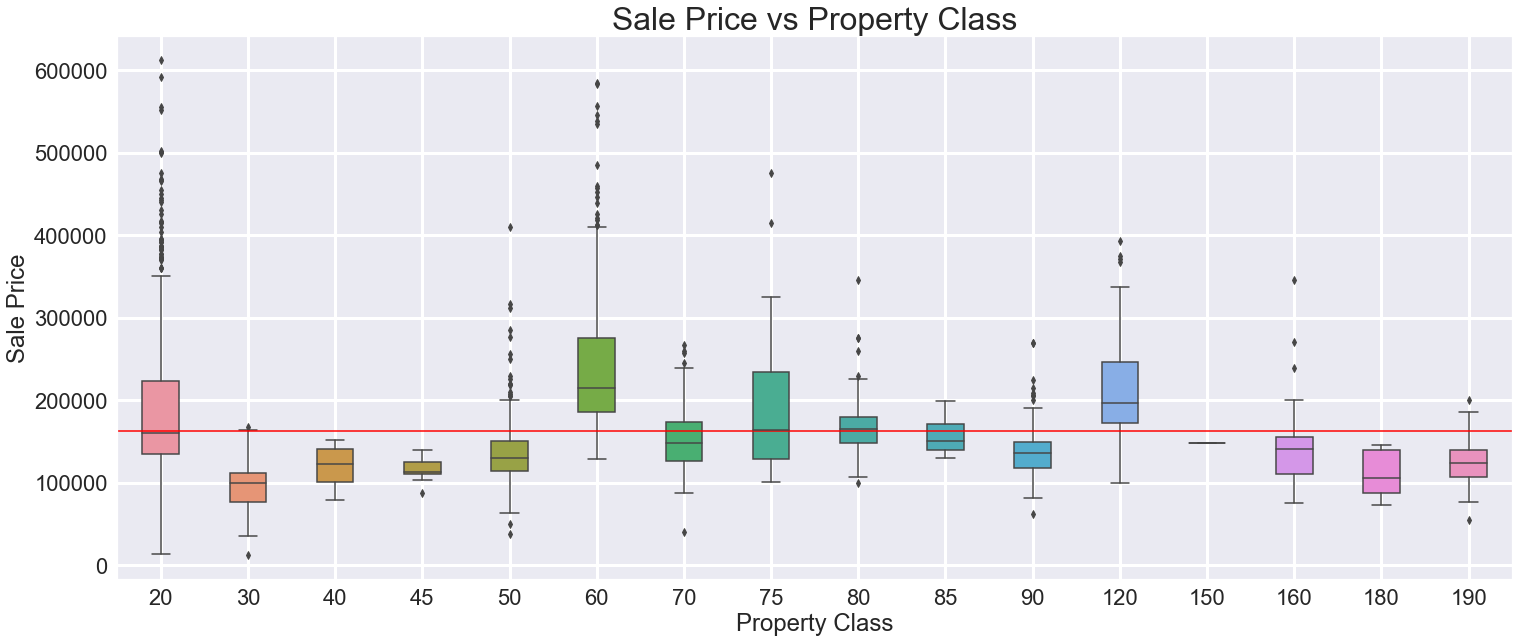

In [124]:
plt.figure(figsize=(25,10))
sns.boxplot(x="ms_subclass", y="saleprice", data=hd_df,width=0.42)
plt.axhline(hd_df['saleprice'].median(), color = 'Red')
plt.title('Sale Price vs Property Class', size=32)
plt.xlabel('Property Class', size = 24)
plt.ylabel('Sale Price', size = 24)
plt.grid(1,linewidth=3)

MS Subclass categories for dummies

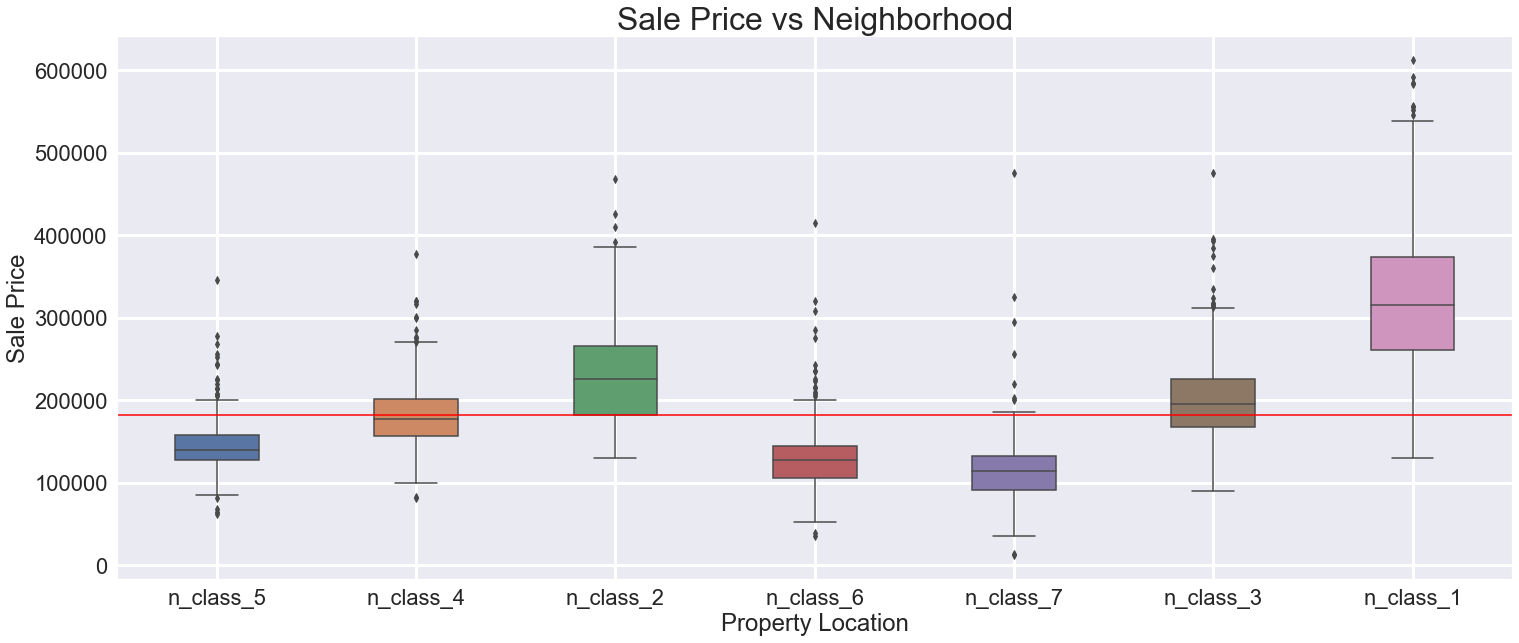

In [125]:
plt.figure(figsize=(25,10))
sns.boxplot(x="neighborhood", y="saleprice", data=hd_df,width=0.42)
plt.axhline(hd_df['saleprice'].mean(), color = 'Red');
plt.title('Sale Price vs Neighborhood', size=32)
plt.xlabel('Property Location', size = 24)
plt.ylabel('Sale Price', size = 24)
plt.grid(1,linewidth=3)

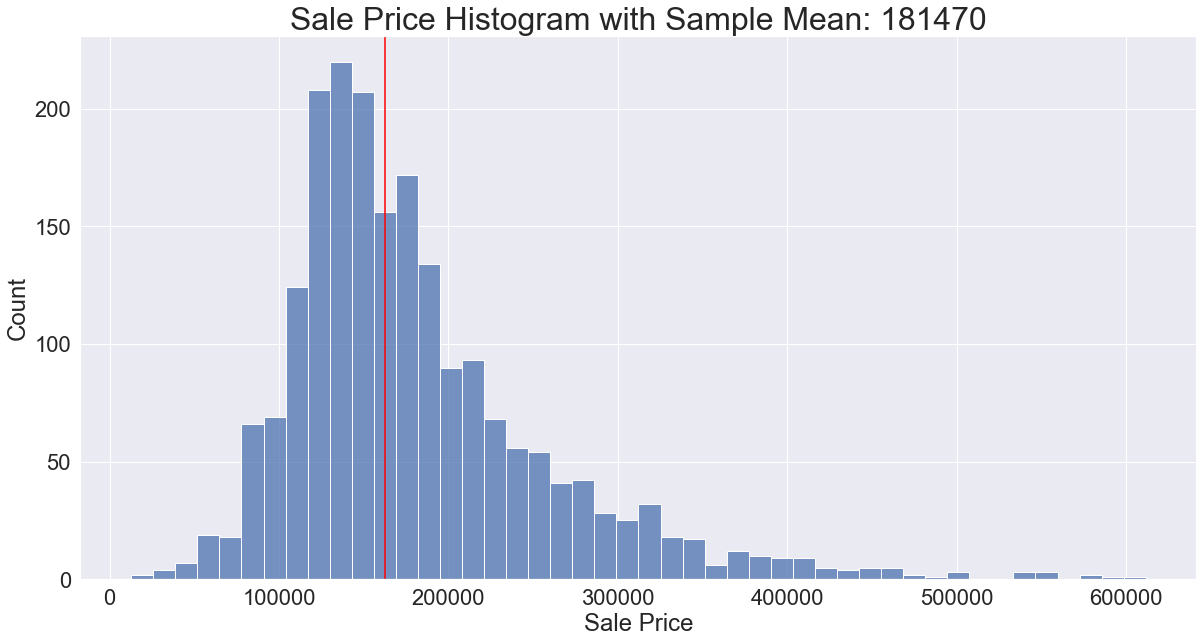

In [126]:
plt.figure(figsize=(20,10))
sns.histplot(data=hd_df,x="saleprice");
plt.axvline(hd_df['saleprice'].median(), color = 'Red');
plt.xlabel('Sale Price', size = 24)
plt.title('Sale Price Histogram with Sample Mean: 181470', size=32);

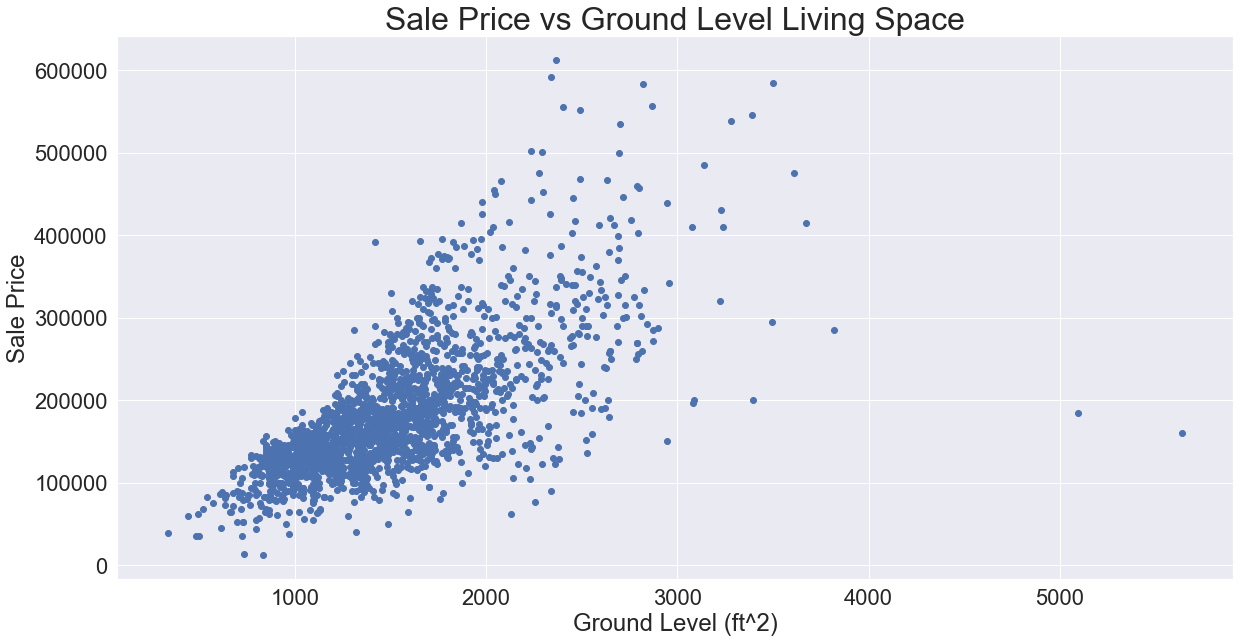

In [127]:
plt.figure(figsize=(20,10))
plt.scatter(hd_df['gr_liv_area'],hd_df['saleprice']);
plt.title('Sale Price vs Ground Level Living Space', size=32)
plt.xlabel('Ground Level (ft^2)', size = 24)
plt.ylabel('Sale Price', size = 24);

## Feature Engineering

Enumerating and setting up for feature engineering on location/area

In [128]:
hd_df['ms_subclass']=hd_df['ms_subclass'].map({60:'MSSupper',120:'MSSupper',75:'MSSupper',20:'MSSmean',80:'MSSmean',85:'MSSlow',70:'MSSlow',\
                                               150:'MSSlow',90:'MSSlow',160:'MSSlow',50:'MSSlow',190:'MSSlow',40:'MSSlow',180:'MSSlow',45:'MSSlow',30:'MSSlow'})  #setting up for dummies
hd_df['ms_zoning']=hd_df['ms_zoning'].map({'FV':FV_val,'RL':RL_val,'RP':RL_val,'RH':RH_val,'RM':RM_val,'C (all)':C_val,'I (all)':I_val,'A (all)':A_val})  #obs mean/sample mean
hd_df['alley']=hd_df['alley'].map({'Pave':Pave_val,'Grvl':Grvl_val}) #setting up alley, normalized to mean, no alley is 1
hd_df['street']=hd_df['street'].map({'Pave':1,'Grvl':0}) #binary, not using 
hd_df['land_slope']=hd_df['land_slope'].map({'Mod':3,'Sev':2,'Gtl':1}) #ordinal enumerated
hd_df['lot_shape']=hd_df['lot_shape'].map({'IR2':4,'IR3':3,'IR1':2,'Reg':1})  #ordinal enumerated
hd_df['land_contour']=hd_df['land_contour'].map({'HLS':HLS_val,'Low':Low_val,'Lvl':Lvl_val,'Bnk':Bnk_val})  #mean scaled
hd_df['lot_config']=hd_df['lot_config'].map({'CulDSac':CulDSac_val,'Inside':Inside_val,'Corner':Corner_val,'FR2':FR2_val,'FR3':FR3_val}) #mean scaled
hd_df['land_interaction']=hd_df['lot_config']*hd_df['land_contour'] #creating an interaction term

Exterior features hot encoding

In [129]:
hd_df['roof_style']=hd_df['roof_style'].map({'Gable':0,'Hip':1,'Flat':1,'Mansard':0,'Shed':1,'Gambrel':0}) #one-hot encode over dummy
hd_df['bldg_type']=hd_df['bldg_type'].map({'1Fam':1,'2fmCon':0,'Duplex':0,'TwnhsE':1,'Twnhs':0})  # hard bias on non single family and end units helped improve model
hd_df['exterior_1st']=hd_df['exterior_1st'].map({'VinylSd':3,'MetalSd':1,'HdBoard':2,'Wd Sdng':1,'Plywood':2,'CemntBd':4,'BrkFace':2,'WdShing':1,'AsbShng':0,'Stucco':1,'BrkComm':2,'Stone':5,'CBlock':0,'ImStucc':5,'AsphShn':0,'Other':0,'Precast':0})
# put some hard bias on the values above the median house price on Exterior 1, might need to tweak this or add in Exterior 2 in combination to make better feature
hd_df['exter_qual']=hd_df['exter_qual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

Basement and foundation information enumeration

In [130]:
hd_df['foundation']=hd_df['foundation'].map({'CBlock':1,'PConc':2,'Wood':1,'BrkTil':0,'Slab':0,'Stone':0})
hd_df['bsmt_qual']=hd_df['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':0})
hd_df['bsmt_exposure']=hd_df['bsmt_exposure'].map({'No':1,'Gd':4,'Av':3,'Mn':2})
hd_df['bsmtfin_type_2']=hd_df['bsmtfin_type_2'].map({'GLQ':6,'Unf':5,'ALQ':4,'Rec':3,'BLQ':2,'LwQ':1})

Heating and Garage finish enumerated

In [131]:
hd_df['heating_qc']=hd_df['heating_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [132]:
hd_df['garage_finish']=hd_df['garage_finish'].map({'Fin':4,'RFn':3,'Unf':2,'NoGar':1})

This is a high leverage interaction term that I created by hot encoding feature values that were in close proximity to the first standard deviation above the mean.  

In [133]:
hd_df['sale_type']=hd_df['sale_type'].map({'New':1,'WD':0,'COD':0,'ConLD':0,'CWD':0,'ConLI':0,'ConLw':0,'Con':0,'Oth':0,'VWD':0})
hd_df['garage_type']=hd_df['garage_type'].map({'BuiltIn':1,'Attchd':0,'2Types':0,'Basement':0,'Detchd':0,'NoGar':0,'CarPort':0})
hd_df['fireplace_qu']=hd_df['fireplace_qu'].map({'Ex':1,'Gd':1,'TA':0,'Fa':0,'NoFp':0,'Po':0})
hd_df['mas_vnr_type']=hd_df['mas_vnr_type'].map({'Stone':1,'BrkFace':0,'None':0,'BrkCmn':0})
hd_df["sale_type"]=hd_df["sale_type"].map(lambda x: np.nan_to_num(x))

In [134]:
hd_df['leverage_pos']=hd_df['sale_type']+hd_df['garage_type']+hd_df['fireplace_qu']+hd_df['mas_vnr_type']

In [135]:
hd_df["leverage_pos"]=hd_df["leverage_pos"].map(lambda x: np.nan_to_num(x))

In [136]:
hd_df[['ms_subclass']].value_counts()

ms_subclass
MSSmean        856
MSSlow         653
MSSupper       542
dtype: int64

In [137]:
neighbor_dum_df=pd.get_dummies(hd_df['neighborhood'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
mssubclass_dum_df=pd.get_dummies(hd_df['ms_subclass'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [138]:
neighbor_dum_df.drop(columns=['n_class_4'],inplace=True)  #removing Greens, low observation count and close to sample mean for SalePrice
mssubclass_dum_df.drop(columns=['MSSmean'],inplace=True)  #removing values around the mean

In [139]:
hd_df=pd.concat([hd_df,neighbor_dum_df],axis=1)

In [140]:
hd_df=pd.concat([hd_df,mssubclass_dum_df],axis=1)

In [141]:
dummy_list_neighborhood=list(neighbor_dum_df.columns)
dummy_list_mssubclass=list(mssubclass_dum_df.columns)

In [142]:
hd_df['alley']=hd_df['alley'].map({'Pave':2,'Grvl':0})
hd_df["alley"]=hd_df["alley"].map(lambda x: np.nan_to_num(x,copy=True, nan=1, posinf=None, neginf=None))

In [143]:
NumFea=['overall_qual','gr_liv_area','garage_area',\
        'full_bath','mas_vnr_area','fireplaces','lot_frontage','lot_area','half_bath',\
        'bsmt_full_bath','ms_zoning','bsmtfin_type_2','leverage_pos',\
        'land_slope','bldg_type','exterior_1st','exter_qual','garage_finish',\
        'bsmt_qual','bsmt_exposure','roof_style','land_interaction','heating_qc'] 

In [144]:
NumFea=NumFea+dummy_list_neighborhood+dummy_list_mssubclass

In [145]:
#hd_df[NumFea].describe().T

In [146]:
#hd_df[NumFea].isna().sum()

In [147]:
hd_df["garage_area"]=hd_df["garage_area"].map(lambda x: np.nan_to_num(x))  #Only one NA value
hd_df["mas_vnr_area"]=hd_df["mas_vnr_area"].map(lambda x: np.nan_to_num(x))
hd_df["total_bsmt_sf"]=hd_df["total_bsmt_sf"].map(lambda x: np.nan_to_num(x)) #Only one NA value
hd_df["lot_frontage"]=hd_df["lot_frontage"].map(lambda x: np.nan_to_num(x)) 
hd_df["bsmt_full_bath"]=hd_df["bsmt_full_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_df["ms_zoning"]=hd_df["ms_zoning"].map(lambda x: np.nan_to_num(x))
hd_df["lot_config"]=hd_df["lot_config"].map(lambda x: np.nan_to_num(x))
hd_df["bsmt_qual"]=hd_df["bsmt_qual"].map(lambda x: np.nan_to_num(x))  #we can just null these since no basement is the NA value
hd_df["bsmt_exposure"]=hd_df["bsmt_exposure"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmtfin_type_2"]=hd_df["bsmtfin_type_2"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmtfin_type_1"]=hd_df["bsmtfin_type_1"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df["bsmt_cond"]=hd_df["bsmt_cond"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_df['pool_qc']=hd_df['pool_qc'].map(lambda x: np.nan_to_num(x))
hd_df['misc_val']=hd_df['misc_val'].map(lambda x: np.nan_to_num(x))
hd_df['misc_feature']=hd_df['misc_feature'].map(lambda x: np.nan_to_num(x))
hd_df['fence']=hd_df['fence'].map(lambda x: np.nan_to_num(x))
hd_df['fireplace_qu']=hd_df['fireplace_qu'].map(lambda x: np.nan_to_num(x))
hd_df['electrical']=hd_df['electrical'].map(lambda x: np.nan_to_num(x))

### Attempted Clever Cleaning

Below is an attempt to clean the large number of NAN values in lot frontage by scaling the values based off of lot area.  While the result was something more interesting then setting the value to the sample mean or null, this is probably causing overfitting on the model.  Below is the work done for it however seeing as it was used

In [148]:
front_filtered=hd_df[hd_df['lot_frontage']>0]

In [149]:
hd_df['lot_frontage'].mean()

57.94441735738664

In [150]:
front_filtered['lot_frontage'].median()

68.0

In [151]:
front_filtered['lot_area'].mean()+front_filtered['lot_area'].std()

14617.28785849153

In [152]:
front_filtered['lot_frontage'].mean()+front_filtered['lot_frontage'].std()

92.31585388749828

In [153]:
lr=LinearRegression()

In [154]:
X1=front_filtered[['lot_area']]
y1=front_filtered['lot_frontage']

In [155]:
lr_front_m=lr.fit(X1,y1)
b0=lr_front_m.intercept_
print(b0)
b1=lr_front_m.coef_[0]
print(b1)

43.33160738510908
0.0026732574575175556


In [156]:
len(hd_df['lot_frontage'])

2051

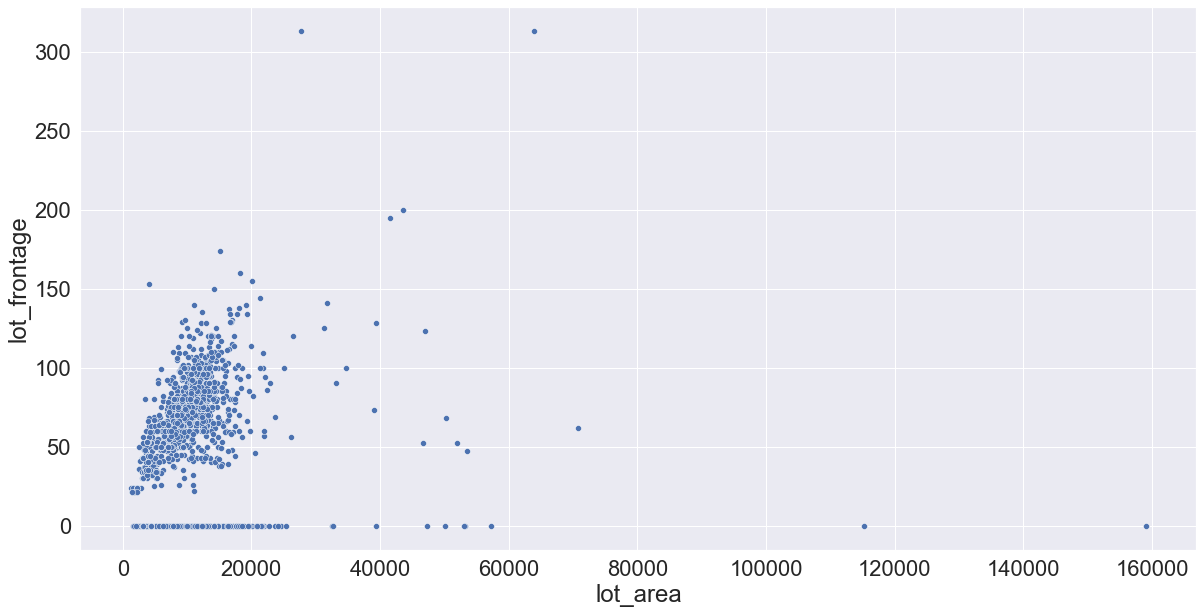

In [157]:
plt.figure(figsize=(20,10)) 
sns.scatterplot(data=hd_df,x="lot_area",y="lot_frontage");

In [158]:
def lot_frontage_conv(b_0,b_1,mu_f):
    #this function will set nulled lot frontage values to an estimated value based on the other 
    #data, and it will set the lot frontage of outliers to the mean of the set
    for x_iter in range(len(hd_df['lot_frontage'])):
        if hd_df.loc[x_iter,'lot_area'] > 80000: hd_df.loc[x_iter,'lot_frontage'] = mu_f
        elif  hd_df.loc[x_iter,'lot_frontage'] == 0: hd_df.loc[x_iter,'lot_frontage'] = b_0+b_1*hd_df.loc[x_iter,'lot_area']

In [159]:
lot_frontage_conv(b0,b1,front_filtered['lot_frontage'].mean())

In [160]:
#front_filtered['lot_area'].describe().T

In [161]:
hd_df['lot_frontage']

0       79.466028
1       43.000000
2       68.000000
3       73.000000
4       82.000000
          ...    
2046    79.000000
2047    76.324951
2048    57.000000
2049    80.000000
2050    60.000000
Name: lot_frontage, Length: 2051, dtype: float64

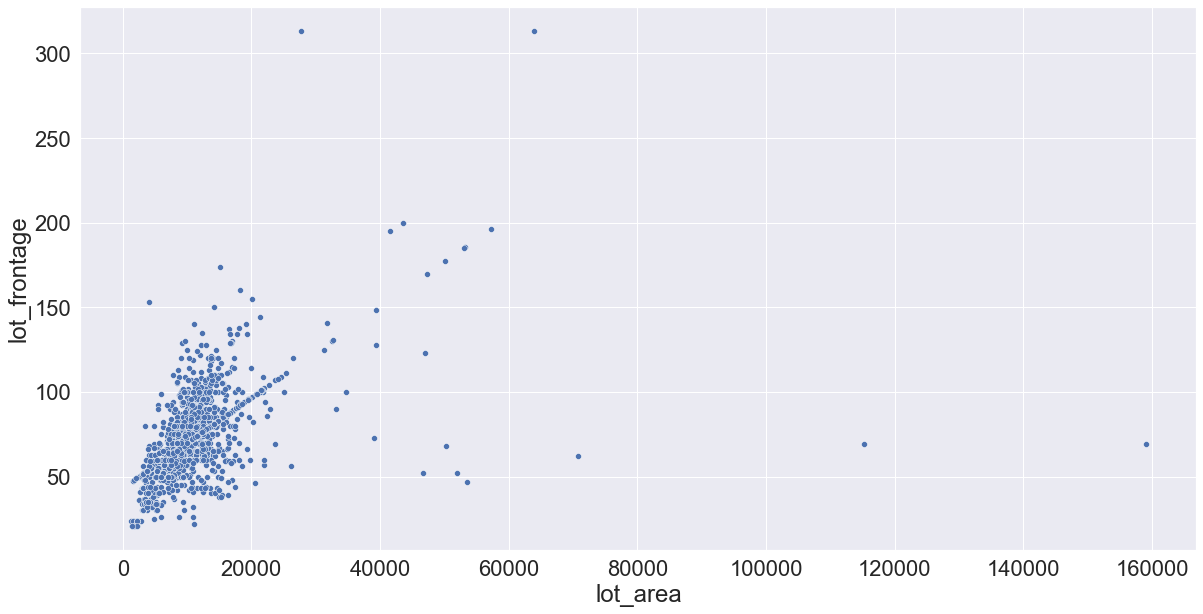

In [162]:
plt.figure(figsize=(20,10)) 
sns.scatterplot(data=hd_df,x="lot_area",y="lot_frontage");

Surely this would not cause issues of bias and reduce the variance of the model!  -__-

In [163]:
pd.set_option('display.max_rows',27)
hd_df[NumFea].isna().sum().sort_values(ascending=False).head(27)

overall_qual        0
exter_qual          0
MSSlow              0
n_class_7           0
n_class_6           0
n_class_5           0
n_class_3           0
n_class_2           0
n_class_1           0
heating_qc          0
land_interaction    0
roof_style          0
bsmt_exposure       0
bsmt_qual           0
garage_finish       0
exterior_1st        0
gr_liv_area         0
bldg_type           0
land_slope          0
leverage_pos        0
bsmtfin_type_2      0
ms_zoning           0
bsmt_full_bath      0
half_bath           0
lot_area            0
lot_frontage        0
fireplaces          0
dtype: int64

Pre-model fitting check of NAN values

## Modeling

In [164]:
X=hd_df[NumFea]
y=hd_df['saleprice']

In [165]:
X.shape

(2051, 31)

In [166]:
y.shape

(2051,)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [168]:
y_null_train=np.full_like(y_train,np.mean(y_train))
y_null_test=np.full_like(y_test,np.mean(y_train))

In [169]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
# could have done in one step X_train fit_transform(X_train)
X_test = ss.transform(X_test)

In [170]:
lr=LinearRegression()
lasso=LassoCV(n_alphas=200)
ridge=RidgeCV(alphas=np.linspace(.01, 100, 1000),fit_intercept=True)

In [171]:
lrmodel=lr.fit(X_train,y_train)

In [172]:
lrmodel_scores = cross_val_score(lr,X_train,y_train,cv=4)

In [173]:
print(lrmodel_scores)

[0.87299157 0.84189536 0.88028512 0.71833785]


In [174]:
lasso_scores= cross_val_score(lasso,X_train,y_train,cv=4)

In [175]:
print(lasso_scores)

[0.87327625 0.84375768 0.88297248 0.71808316]


In [176]:
ridge_scores = cross_val_score(ridge,X_train,y_train,cv=4)

In [177]:
print(ridge_scores)

[0.87197356 0.84014106 0.88176911 0.7225762 ]


In [178]:
y_preds=lrmodel.predict(X_test)

In [179]:
ms.r2_score(y_test,y_preds)

0.872919843230908

In [180]:
ms.mean_squared_error(y_test,y_preds)

780275305.2940136

In [181]:
"{:e}".format(np.sqrt(ms.mean_squared_error(y_test,y_preds)))

'2.793341e+04'

In [182]:
ms.r2_score(y_test,y_preds)

0.872919843230908

In [183]:
ridge.fit(X_train, y_train);

In [184]:
y_preds_r=ridge.predict(X_test)

In [185]:
lasso.fit(X_train, y_train);

In [186]:
y_preds_l=lasso.predict(X_test)

**Ridge Score Values**

In [187]:
ms.r2_score(y_test,y_preds_r)

0.8726477438210616

In [188]:
"{:e}".format(np.sqrt(ms.mean_squared_error(y_test,y_preds_r)))

'2.796330e+04'

**Lasso Score Values**

In [189]:
ms.r2_score(y_test,y_preds_l)

0.8743935589130565

In [190]:
"{:e}".format(np.sqrt(ms.mean_squared_error(y_test,y_preds_l)))

'2.777097e+04'

In [191]:
"{:e}".format(np.sqrt(ms.mean_squared_error(y_test,y_null_test)))

'7.837528e+04'

In [192]:
"{:e}".format(np.sqrt(ms.mean_squared_error(y_train,y_null_train)))

'7.952685e+04'

In [193]:
ms.r2_score(y_test,y_null_test)

-0.0004332658021117819

In [194]:
ms.r2_score(y_train,y_null_train)

-1.560653828391878e-10

In comparison to our baseline, the model showed divergence from the null model (in both R^2 and RMSE metrics) showing that variance from the mean is being described by the model.

**Lasso has performed the best everytime, therefore it will be the model of choice for reporting results**

In [195]:
pd.set_option('display.max_rows',36)

In [196]:
lasso.intercept_

181061.9934980494

Because we have scaled the data to the mean with standard scalar it makes sense that our intercept is close to the calculated mean prior.  Additionally, that means that all coefficients describe the variance as such: All else equal one unit of the feature changing reflects 1 standard deviation change of that unit on the sale price of the house.

In [197]:
pd.DataFrame({'Features':hd_df[NumFea].columns.values.tolist(),'Coef':lasso.coef_})

,Features,Coef
0,overall_qual,16012.505524
1,gr_liv_area,20817.045512
2,garage_area,5438.058215
3,full_bath,3765.533535
4,mas_vnr_area,1936.757464
5,fireplaces,3348.729012
6,lot_frontage,-1166.777290
7,lot_area,2945.563692
8,half_bath,2557.812181
9,bsmt_full_bath,6467.816087


Features that were tried and removed as lasso was zeroing them out: open_porch_sf, wood_deck_sf, total_bsmt_sf, lot_shape, foundation.  I am leaving garage finish in even though it is zeroed out.

## Kaggle Submission Process

In [198]:

hd_test_df["garage_area"]=hd_test_df["garage_area"].map(lambda x: np.nan_to_num(x))  #Only one NA value
hd_test_df["mas_vnr_area"]=hd_test_df["mas_vnr_area"].map(lambda x: np.nan_to_num(x))  #There are also 22 observations of masonry type so these lots just do not have a correct 0 or none type
hd_test_df["total_bsmt_sf"]=hd_test_df["total_bsmt_sf"].map(lambda x: np.nan_to_num(x)) #Only one NA value
hd_test_df["lot_frontage"]=hd_test_df["lot_frontage"].map(lambda x: np.nan_to_num(x)) 
hd_test_df["bsmt_full_bath"]=hd_test_df["bsmt_full_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_test_df["bsmt_half_bath"]=hd_test_df["bsmt_half_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_test_df["bsmt_qual"]=hd_test_df["bsmt_qual"].map(lambda x: np.nan_to_num(x))  #we can just null these since no basement is the NA valu
hd_test_df["bsmt_exposure"]=hd_test_df["bsmt_exposure"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmtfin_type_2"]=hd_test_df["bsmtfin_type_2"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmtfin_type_1"]=hd_test_df["bsmtfin_type_1"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmt_cond"]=hd_test_df["bsmt_cond"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df['pool_qc']=hd_test_df['pool_qc'].map(lambda x: np.nan_to_num(x))
hd_test_df['misc_val']=hd_test_df['misc_val'].map(lambda x: np.nan_to_num(x))
hd_test_df['misc_feature']=hd_test_df['misc_feature'].map(lambda x: np.nan_to_num(x))
hd_test_df['fence']=hd_test_df['fence'].map(lambda x: np.nan_to_num(x))
hd_test_df['fireplace_qu']=hd_test_df['fireplace_qu'].map(lambda x: np.nan_to_num(x))
hd_test_df['electrical']=hd_test_df['electrical'].map(lambda x: np.nan_to_num(x))


hd_test_df["alley"]=hd_test_df["alley"].map(lambda x: np.nan_to_num(x,copy=True, nan=1, posinf=None, neginf=None))

hd_test_df['neighborhood']=hd_test_df['neighborhood'].map({'StoneBr':'n_class_1','NridgHt':'n_class_1','NoRidge':'n_class_1','GrnHill':'n_class_1',\
'Veenker':'n_class_2','Timber':'n_class_2','Somerst':'n_class_2','ClearCr':'n_class_2',\
'Crawfor':'n_class_3','CollgCr':'n_class_3','Blmngtn':'n_class_3','NWAmes':'n_class_3',\
'Gilbert':'n_class_4','Greens':'n_class_4','SawyerW':'n_class_4','Mitchel':'n_class_4',\
'NAmes':'n_class_5','Blueste':'n_class_5','NPkVill':'n_class_5','Sawyer':'n_class_5',\
'Landmrk':'n_class_6','SWISU':'n_class_6','Edwards':'n_class_6','BrkSide':'n_class_6',\
'OldTown':'n_class_7','BrDale':'n_class_7','IDOTRR':'n_class_7','MeadowV':'n_class_7'})

hd_test_df["fireplace_qu"]=hd_test_df["fireplace_qu"].apply(lambda x: 'NoFp' if x == 0 else x)

hd_test_df["garage_type"]=hd_test_df["garage_type"].map(lambda x: np.nan_to_num(x))
hd_test_df["garage_type"]=hd_test_df["garage_type"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_test_df["garage_qual"]=hd_test_df["garage_qual"].map(lambda x: np.nan_to_num(x))
hd_test_df["garage_qual"]=hd_test_df["garage_qual"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_test_df["garage_finish"]=hd_test_df["garage_finish"].map(lambda x: np.nan_to_num(x))
hd_test_df["garage_finish"]=hd_test_df["garage_finish"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_test_df["garage_yr_blt"]=hd_test_df["garage_yr_blt"].map(lambda x: np.nan_to_num(x))
hd_test_df["garage_yr_blt"]=hd_test_df["garage_yr_blt"].apply(lambda x: 'NoGar' if x == 0 else x)
hd_test_df["garage_cond"]=hd_test_df["garage_cond"].map(lambda x: np.nan_to_num(x))
hd_test_df["garage_cond"]=hd_test_df["garage_cond"].apply(lambda x: 'NoGar' if x == 0 else x)

hd_test_df["fence"]=hd_test_df["fence"].apply(lambda x: 'NoFen' if x == 0 else x)

hd_test_df['ms_subclass']=hd_test_df['ms_subclass'].map({60:'MSSupper',120:'MSSupper',75:'MSSupper',20:'MSSmean',80:'MSSmean',85:'MSSlow',70:'MSSlow',\
                                               150:'MSSlow',90:'MSSlow',160:'MSSlow',50:'MSSlow',190:'MSSlow',40:'MSSlow',180:'MSSlow',45:'MSSlow',30:'MSSlow'})  #setting up for dummies
hd_test_df['ms_zoning']=hd_test_df['ms_zoning'].map({'FV':FV_val,'RL':RL_val,'RP':RL_val,'RH':RH_val,'RM':RM_val,'C (all)':C_val,'I (all)':I_val,'A (all)':A_val})  #obs mean/sample mean
hd_test_df['alley']=hd_test_df['alley'].map({'Pave':Pave_val,'Grvl':Grvl_val}) #setting up alley, normalized to mean, no alley is 1
hd_test_df['street']=hd_test_df['street'].map({'Pave':1,'Grvl':0}) #binary, not using 
hd_test_df['land_slope']=hd_test_df['land_slope'].map({'Mod':3,'Sev':2,'Gtl':1}) #ordinal enumerated
hd_test_df['lot_shape']=hd_test_df['lot_shape'].map({'IR2':4,'IR3':3,'IR1':2,'Reg':1})  #ordinal enumerated
hd_test_df['land_contour']=hd_test_df['land_contour'].map({'HLS':HLS_val,'Low':Low_val,'Lvl':Lvl_val,'Bnk':Bnk_val})  #mean scaled
hd_test_df['lot_config']=hd_test_df['lot_config'].map({'CulDSac':CulDSac_val,'Inside':Inside_val,'Corner':Corner_val,'FR2':FR2_val,'FR3':FR3_val}) #mean scaled
hd_test_df['land_interaction']=hd_test_df['lot_config']*hd_test_df['land_contour'] #creating an interaction term

hd_test_df['roof_style']=hd_test_df['roof_style'].map({'Gable':0,'Hip':1,'Flat':1,'Mansard':0,'Shed':1,'Gambrel':0}) #one-hot encode over dummy
hd_test_df['bldg_type']=hd_test_df['bldg_type'].map({'1Fam':1,'2fmCon':0,'Duplex':0,'TwnhsE':1,'Twnhs':0})  # hard bias on non single family and end units helped improve model
hd_test_df['exterior_1st']=hd_test_df['exterior_1st'].map({'VinylSd':3,'MetalSd':1,'HdBoard':2,'Wd Sdng':1,'Plywood':2,'CemntBd':4,'BrkFace':2,'WdShing':1,'AsbShng':0,'Stucco':1,'BrkComm':2,'Stone':5,'CBlock':0,'ImStucc':5,'AsphShn':0,'Other':0,'Precast':0})
# put some hard bias on the values above the median house price on Exterior 1, might need to tweak this or add in Exterior 2 in combination to make better feature
hd_test_df['exter_qual']=hd_test_df['exter_qual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

hd_test_df['foundation']=hd_test_df['foundation'].map({'CBlock':1,'PConc':2,'Wood':1,'BrkTil':0,'Slab':0,'Stone':0})
hd_test_df['bsmt_qual']=hd_test_df['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':0})
hd_test_df['bsmt_exposure']=hd_test_df['bsmt_exposure'].map({'No':1,'Gd':4,'Av':3,'Mn':2})
hd_test_df['bsmtfin_type_2']=hd_test_df['bsmtfin_type_2'].map({'GLQ':6,'Unf':5,'ALQ':4,'Rec':3,'BLQ':2,'LwQ':1})

hd_test_df['heating_qc']=hd_test_df['heating_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

hd_test_df['garage_finish']=hd_test_df['garage_finish'].map({'Fin':4,'RFn':3,'Unf':2,'NoGar':1})

hd_test_df['sale_type']=hd_test_df['sale_type'].map({'New':1,'WD':0,'COD':0,'ConLD':0,'CWD':0,'ConLI':0,'ConLw':0,'Con':0,'Oth':0,'VWD':0})
hd_test_df['garage_type']=hd_test_df['garage_type'].map({'BuiltIn':1,'Attchd':0,'2Types':0,'Basement':0,'Detchd':0,'NoGar':0,'CarPort':0})
hd_test_df['fireplace_qu']=hd_test_df['fireplace_qu'].map({'Ex':1,'Gd':1,'TA':0,'Fa':0,'NoFp':0,'Po':0})
hd_test_df['mas_vnr_type']=hd_test_df['mas_vnr_type'].map({'Stone':1,'BrkFace':0,'None':0,'BrkCmn':0})
hd_test_df["sale_type"]=hd_test_df["sale_type"].map(lambda x: np.nan_to_num(x))

hd_test_df['leverage_pos']=hd_test_df['sale_type']+hd_test_df['garage_type']+hd_test_df['fireplace_qu']+hd_test_df['mas_vnr_type']

hd_test_df["leverage_pos"]=hd_test_df["leverage_pos"].map(lambda x: np.nan_to_num(x))

neighbor_dum_df=pd.get_dummies(hd_test_df['neighborhood'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
mssubclass_dum_df=pd.get_dummies(hd_test_df['ms_subclass'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

neighbor_dum_df.drop(columns=['n_class_4'],inplace=True)  #removing Greens, low observation count and close to sample mean for SalePrice
mssubclass_dum_df.drop(columns=['MSSmean'],inplace=True)  #removing values around the mean

hd_test_df=pd.concat([hd_test_df,neighbor_dum_df],axis=1)
hd_test_df=pd.concat([hd_test_df,mssubclass_dum_df],axis=1)

dummy_list_neighborhood=list(neighbor_dum_df.columns)
dummy_list_mssubclass=list(mssubclass_dum_df.columns)

NumFeaT=['overall_qual','gr_liv_area','garage_area',\
        'full_bath','mas_vnr_area','fireplaces','lot_frontage','lot_area','half_bath',\
        'bsmt_full_bath','ms_zoning','bsmtfin_type_2','leverage_pos',\
        'land_slope','bldg_type','exterior_1st','exter_qual','garage_finish',\
        'bsmt_qual','bsmt_exposure','roof_style','land_interaction','heating_qc'] 

NumFeaT=NumFeaT+dummy_list_neighborhood+dummy_list_mssubclass

hd_test_df["garage_area"]=hd_test_df["garage_area"].map(lambda x: np.nan_to_num(x))  #Only one NA value
hd_test_df["mas_vnr_area"]=hd_test_df["mas_vnr_area"].map(lambda x: np.nan_to_num(x))
hd_test_df["total_bsmt_sf"]=hd_test_df["total_bsmt_sf"].map(lambda x: np.nan_to_num(x)) #Only one NA value
hd_test_df["lot_frontage"]=hd_test_df["lot_frontage"].map(lambda x: np.nan_to_num(x)) 
hd_test_df["bsmt_full_bath"]=hd_test_df["bsmt_full_bath"].map(lambda x: np.nan_to_num(x)) #Only two NA value
hd_test_df["ms_zoning"]=hd_test_df["ms_zoning"].map(lambda x: np.nan_to_num(x))
hd_test_df["lot_config"]=hd_test_df["lot_config"].map(lambda x: np.nan_to_num(x))
hd_test_df["bsmt_qual"]=hd_test_df["bsmt_qual"].map(lambda x: np.nan_to_num(x))  #we can just null these since no basement is the NA value
hd_test_df["bsmt_exposure"]=hd_test_df["bsmt_exposure"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmtfin_type_2"]=hd_test_df["bsmtfin_type_2"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmtfin_type_1"]=hd_test_df["bsmtfin_type_1"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df["bsmt_cond"]=hd_test_df["bsmt_cond"].map(lambda x: np.nan_to_num(x)) #we can just null these since no basement is the NA value
hd_test_df['pool_qc']=hd_test_df['pool_qc'].map(lambda x: np.nan_to_num(x))
hd_test_df['misc_val']=hd_test_df['misc_val'].map(lambda x: np.nan_to_num(x))
hd_test_df['misc_feature']=hd_test_df['misc_feature'].map(lambda x: np.nan_to_num(x))
hd_test_df['fence']=hd_test_df['fence'].map(lambda x: np.nan_to_num(x))
hd_test_df['fireplace_qu']=hd_test_df['fireplace_qu'].map(lambda x: np.nan_to_num(x))
hd_test_df['electrical']=hd_test_df['electrical'].map(lambda x: np.nan_to_num(x))
hd_test_df['exterior_1st']=hd_test_df['exterior_1st'].map(lambda x: np.nan_to_num(x))

In [199]:
X1=ss.transform(hd_test_df[NumFeaT])

In [200]:
kag_preds = lasso.predict(X1)

In [201]:
pd.set_option('display.max_rows',54)

In [202]:
hd_test_df[NumFeaT].isnull().sum()

overall_qual        0
gr_liv_area         0
garage_area         0
full_bath           0
mas_vnr_area        0
fireplaces          0
lot_frontage        0
lot_area            0
half_bath           0
bsmt_full_bath      0
ms_zoning           0
bsmtfin_type_2      0
leverage_pos        0
land_slope          0
bldg_type           0
exterior_1st        0
exter_qual          0
garage_finish       0
bsmt_qual           0
bsmt_exposure       0
roof_style          0
land_interaction    0
heating_qc          0
n_class_1           0
n_class_2           0
n_class_3           0
n_class_5           0
n_class_6           0
n_class_7           0
MSSlow              0
MSSupper            0
dtype: int64

In [203]:
hd_test_df[NumFeaT].shape

(878, 31)

In [204]:
hd_df[NumFea].shape

(2051, 31)

In [205]:
kag_preds.shape

(878,)

In [206]:
kag_submission={'Id' : hd_test_df['Id'], 'SalePrice' : kag_preds}

KeyError: 'Id'

In [ ]:
kag_submission = pd.DataFrame(kag_submission)

In [ ]:
kag_submission.to_csv('./pjw_submission.csv', index=False)